In [31]:
from astropy import units as u

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
import pandas as pd

In [33]:
def m(size):
    # generate float number between 1 and 3 with size len(m)
    return np.random.uniform(1,3,size) * u.M_sun

In [34]:
# Generating dataset
size = 1000

m1_lst = []
m2_lst = []

while len(m1_lst) < size:
    m1 = m(1)
    m2 = m(1)
    # if m1 > m2:
    m1_lst.append(m1)
    m2_lst.append(m2)
        
m1 = np.array(m1_lst) * u.M_sun
m2 = np.array(m2_lst) * u.M_sun

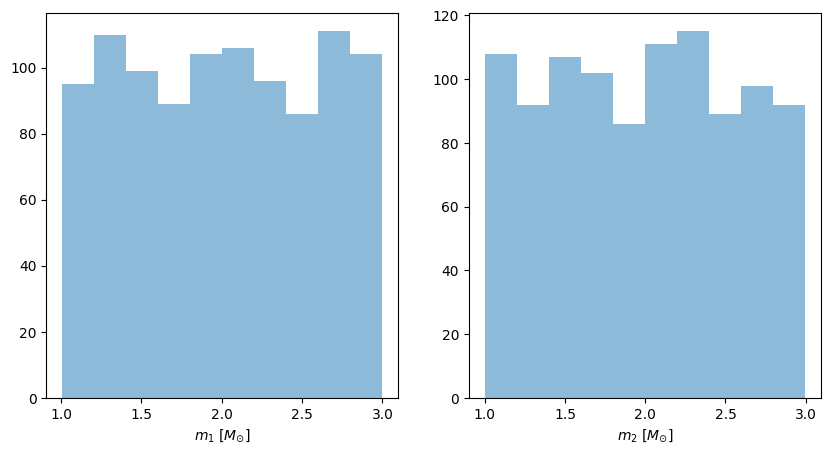

In [35]:
# two plots side by side
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(m1, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_1$ $[M_{\odot}]$')
plt.subplot(1,2,2)
plt.hist(m2, bins=10, alpha=0.5, label='m1')
plt.xlabel(r'$m_2$ $[M_{\odot}]$')
plt.savefig('histogram_BNS.png')

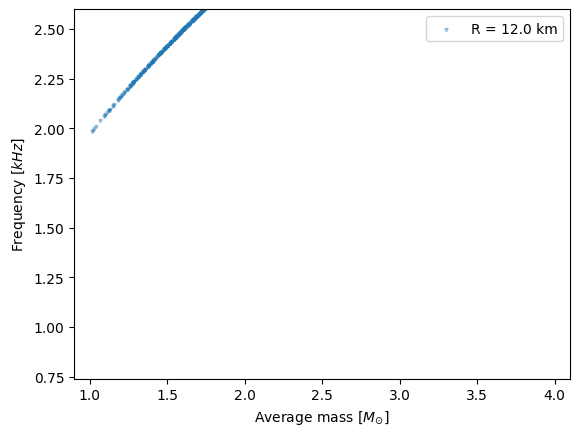

In [36]:
from astropy.constants import G

for a_val in [12]:
    a = a_val * u.km
    num = (4*np.pi**2) * a**3
    dem = G*(m1+m2)
    P = np.sqrt(num/dem)
    f_kepler = (1/P).to(u.Hz)
    m_avg = (m1+m2)/2
    
    lower = np.percentile(f_kepler, 5)
    upper = np.percentile(f_kepler, 95)
    median = np.percentile(f_kepler, 50)
    mean = np.mean(f_kepler)
    
    plt.scatter(m_avg, f_kepler.to(u.kHz), alpha=0.5, s=10, marker = "1", label = f"R = {a}")
plt.ylim(0.74, 2.6)
plt.xlim(0.9, 4.1)
plt.xlabel(r'Average mass $[M_{\odot}]$')
plt.ylabel(r'Frequency $[kHz]$')
plt.legend()
plt.savefig('contact_BNS.png')

In [37]:
df = pd.DataFrame({"m1": m1.value.squeeze(), "m2": m2.value.squeeze()})
df['f_kepler'] = f_kepler.value.squeeze()
df['m_avg'] = m_avg.value.squeeze()
df.to_csv('contact_BNS.csv')

In [38]:
df

,m1,m2,f_kepler,m_avg
0,1.276569,1.843017,2463.499941,1.559793
1,1.593155,1.290534,2368.526718,1.441844
2,2.086253,1.815608,2755.116490,1.950930
3,1.894204,2.210659,2825.878071,2.052432
4,2.635109,2.401248,3130.129759,2.518179
...,...,...,...,...
995,1.248430,2.114327,2557.713362,1.681379
996,1.273353,2.654776,2764.375139,1.964065
997,1.912740,1.296751,2498.746468,1.604746
998,1.353180,2.475100,2729.015267,1.914140
